# Index theory

First read some libraries needed. Notice, the functions we defined for plotting phase diagrams last time have been moved to a file *phase_portraits* and the file is being read in as a library.


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import phase_portraits as pp 
%matplotlib inline

## The example from last time
We will use
$$
\begin{array}{rl}
 x'(t) = & y \\[0.5pt]
 y'(t) = & x(1-x^2)-y
\end{array}
$$
as an example. Defining the function:

In [2]:
def rhs(t,xy):
    x,y=xy
    dx=y
    dy=x*(1-x**2)-y
    return [dx,dy]

## Jordan curves
 

### Definition of Jordan curves (Definition 8 on p 121)
A planar simple closed curve is called a *Jordan curve*.



In [161]:


def plot_jordan(ax,rhs,r0=[0,0],rr=1,num=25,vectors=True, color='blue',linewidth=1.5):
    theta=np.linspace(0,2*np.pi, num)
    x=rr*np.cos(theta)+r0[0]
    y=rr*np.sin(theta)+r0[1]
    ax.plot(x,y,linewidth=linewidth, color=color)
    if vectors:
        U,V=rhs(0,[x,y])
        ax.quiver(x,y,U,V,angles='xy', scale_units='xy', scale=3)

    return ax





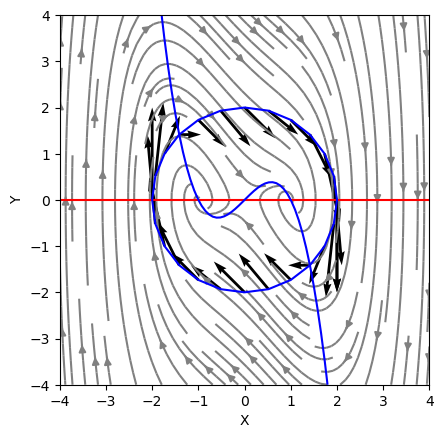

In [162]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=pp.plot_flow(ax,rhs,xrange=[-4,4],yrange=[-4,4],nullclines=True)

# Lets plot a Jordan curve, a circle. 
r0=[0,0]  # the coordinates for the centre of the circle
rr=2    # the radius of the circle
ax=plot_jordan(ax,rhs,r0=r0, rr=rr, vectors=True)
#ax.set_xlim(0.5,1.5)
#ax.set_ylim(1.5,2.5)


#ax=plot_jordan(ax,rhs,r0=r0, rr=1, vectors=True)

## The pendulum

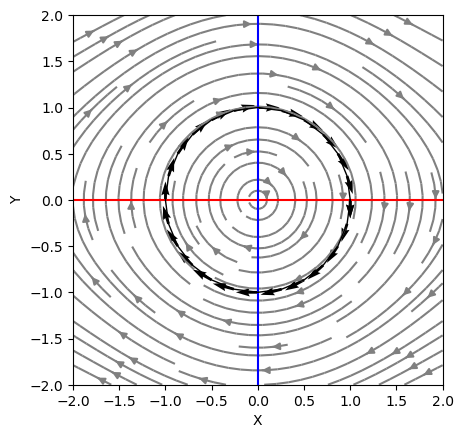

In [156]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=pp.plot_flow(ax,pendulum,xrange=[-2,2],yrange=[-2,2],nullclines=True)

#ax=pp.plot_solution(ax,pendulum,[0.25,0.25],t_end=200)
#ax=pp.plot_solution(ax,pendulum,[0.8,0.25],t_end=200)
ax=plot_jordan(ax,pendulum,rr=1.,vectors=True,linewidth=1,color='black')


### Example 1
$$
\begin{array}{rl}
\dot{x}=F(x,y)=&2x^2-1\\
\dot{y}=G(x,y)=&2xy
\end{array}
$$

In [95]:
def ex1(t,xy):
    x,y= xy
    return [2*x**2-1,2*x*y]

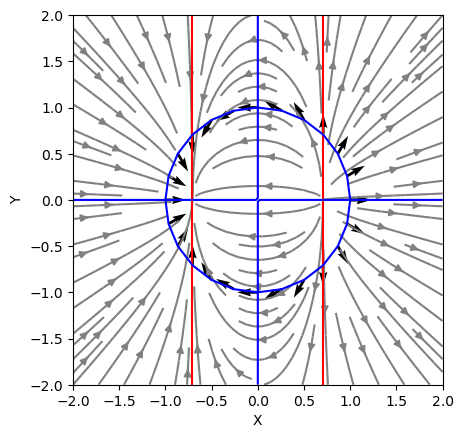

In [123]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=pp.plot_flow(ax,ex1,xrange=[-2,2],yrange=[-2,2],nullclines=True)
ax=plot_jordan(ax,ex1,r0=[0,0], rr=1., vectors=True)

### Example 2
Let's look at the different critical points. Look at the following system: 
$$
\begin{array}{rl}
\dot{x}=& y \\
\dot{y}=&\beta x + 2\alpha y
\end{array}
$$

We have the following eigenvalues:
$$
\lambda_{\pm}=\alpha \pm \sqrt{\alpha^2+\beta}
$$

Cases: 
- Saddle point: try $\alpha=0$ and $\beta=2$
- Centre: try $\alpha=0$ and $\beta=-2$
- Stable node: try $\alpha=-1$ and $\beta=-0.5$
- Unstable node: try $\alpha=1$ and $\beta=-0.5$
- Stable spiral: try $\alpha=-1$ and $\beta=0.5$
- Stable spiral: try $\alpha=1$ and $\beta=0.5$

Use this to look at the index of the different critical points. 



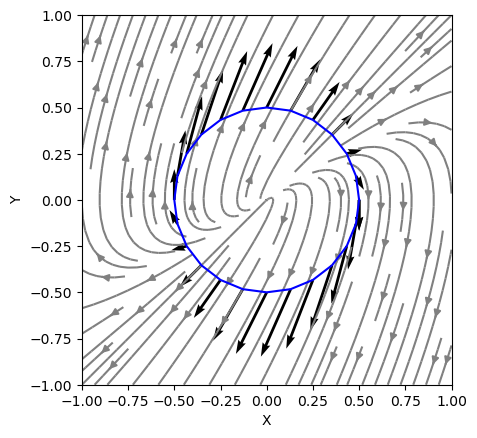

In [170]:
def ex2(t,xy):
    # alpha > 0 
    alpha=1
    beta=-1
    x,y=xy
    dx=y
    dy=beta*x+2*alpha*y
    return [dx,dy]
ig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=pp.plot_flow(ax,ex2,xrange=[-1,1],yrange=[-1,1],nullclines=False)
ax=plot_jordan(ax,ex2,r0=[0,0], rr=0.5, vectors=True)